# Week 8 - Graph Embeddings


This week, we are going to work with graph embeddings. Let's first import the needed libraries:

In [1]:
import networkx as nx
import scipy as sp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Below, we have included some code to plot the [karate graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

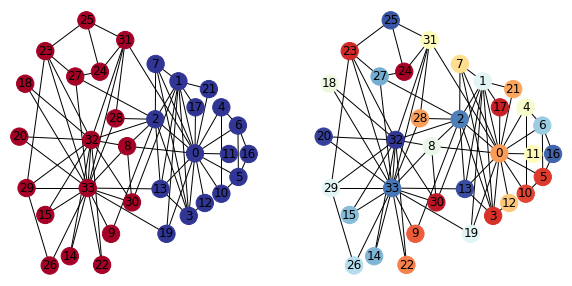

In [71]:
def plot_karate(G, pr=[], ax=None, cmap=plt.get_cmap('RdYlBu')): 
    fixed_positions = {0:(10.74,4.07),1:(9.76,6.48),2:(8.39,5.21),3:(10.37,1.98),4:(12.30,5.61),5:(13.31,3.28),6:(13.28,5.00),7:(8.41,7.06),8:(6.72,4.31),9:(5.77,1.38),10:(12.30,2.72),11:(12.75,4.05),12:(11.32,2.41),13:(8.70,2.88),14:(3.33,0.63),15:(1.88,2.01),16:(13.92,4.05),17:(10.77,5.61),18:(0.69,6.40),19:(9.05,1.38),20:(0.34,4.63),21:(11.56,6.22),22:(5.24,0.34),23:(1.88,7.49),24:(5.11,6.80),25:(4.31,8.52),26:(2.14,0.32),27:(3.65,6.64),28:(6.03,5.24),29:(0.77,2.91),30:(7.01,2.43),31:(6.61,7.86),32:(4.60,4.52),33:(4.39,2.91)}
    if len(pr) :
        nx.draw(G, with_labels=True, pos=fixed_positions, ax=ax, cmap=cmap, node_color=pr)
    else : 
        nx.draw(G, with_labels=True, pos=fixed_positions, ax=ax)

G = nx.karate_club_graph()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
magic_cut = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_karate(G, magic_cut, ax=ax[0])
plot_karate(G, np.random.rand(G.order()), ax=ax[1])

## Exercise 1 - Similarity matrices
In this first exercise, we will implement different similarity matrices.

For the following three node-similarity measures, implement the corresponding methods below.
 1. Adjacency similarity.
 1. 2-hop similarity ($A^2$).
 1. Come up with your own measure of node similarity. You could, e.g., take neighbor-overlap into account. 
 
You can try to visualize the similarities in the following code block by setting the node index `i`.

In [ ]:
def adjacency_similarity(G):
    """
        Input: A networkx graph with n nodes
        Output: A normlized adjacency matrix of size [n, n], where each row sum to 1
    """
    ### YOUR CODE HERE    
    ### YOUR CODE HERE    
    return S 


def two_hub(G, k=2):
    """
        Input: A networkx graph with n nodes
        Output: A^2, where A is the adjacency matrix 
    """
    ### YOUR CODE HERE    
    ### YOUR CODE HERE    
    return S


def my_similarity(G):
    """
        Input: A networkx graph with n nodes
        Output: A [n, n] matrix of pair-wise similarities
    """
    ### YOUR CODE HERE    
    ### YOUR CODE HERE    
    return S 

# Check for normalization
fns = [adjacency_similarity, two_hub, my_similarity]
for fn in fns: 
    assert np.allclose(fn(G)[0].sum(), 1)
    assert fn(G).sum() == G.order()

Plotting similarities for Node 2


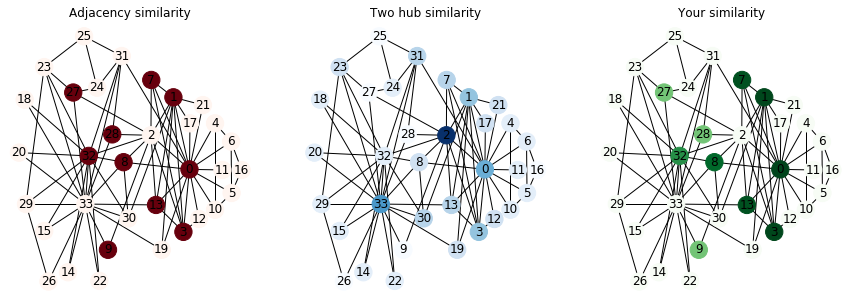

In [78]:
S1 = adjacency_similarity(G)
S2 = two_hub(G)
S3 = my_similarity(G)

# Plot similaritites
i = 2
print("Plotting similarities for Node %d" % i)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title("Adjacency similarity")
plot_karate(G, S1[i,:], ax=ax[0], cmap=plt.get_cmap('Reds'))
ax[1].set_title("Two hub similarity")
plot_karate(G, S2[i,:], ax=ax[1], cmap=plt.get_cmap('Blues'))
ax[2].set_title("Your similarity")
plot_karate(G, S3[i,:], ax=ax[2], cmap=plt.get_cmap('Greens'))

## Exercise 2 - Linear embeddings

This exercise is about Linear embeddings and how to perform dimensionality reduction on the similarity matrices from Exercise 1.

Linear embeddings typically perform some linear dimensionality reduction on, variations of the Adjacency matrix $A\in \{0,1\}^{n \times n}$ for an **undirected graph** $G = (V,E)$. 

A linear embedding finds a matrix $Z \in \mathbb{R}^{n\times d}$ which contains a $d$-dimensional representation of a given node in the network. The methods minimize a "reconstruction error" of the embedding with respect to the adjacecy matrix

$$
\mathcal{L}(A,Z) = \sum_{(i,j) \in E}(Z_{i}^\top Z_{j} - A_{i,j})^2 = \|ZZ^\top - A\|_F^2 \quad \quad \quad (1)
$$

1. Show that if instead of one matrxix Z we have two $B \in \mathbb{R}^{n\times d}$ and $C \in \mathbb{R}^{n\times d}$, the best solution to the above minimization can be obtained by SVD on $A$
2. What is the gradient of Equation 1 for a single row $Z_{i\cdot}$ of the matrix $Z$, i.e., $\frac{\partial \mathcal{L}}{\partial Z_i}$?
3. Implement the linear embedding above using gradient descent on the three different similaririty matrices from Exercise 1.


**1. Solution**: By the Eckart-Young theorem, the above objective is equivalent to computing the $\text{SVD}(\hat{A}) = U\Sigma V^\top$ and take   
$B = U_d\Sigma^{1/2}_d$ and $C = V_d\Sigma^{1/2}_d$.

**2. Solution**: For a single row the gradient is $\frac{\partial \mathcal{L}}{\partial Z_{i}}=-2\sum_{j}\left(\hat{A}_{i j}-\left\langle Z_{i}, Z_{j}\right\rangle\right) Z_{j}$

In [ ]:
np.random.seed(0)

def lin_grads(A, Z): 
    ### YOUR CODE HERE    
    ### YOUR CODE HERE    
    return grad

def lin_loss(A, Z): 
    ### YOUR CODE HERE    
    ### YOUR CODE HERE    
    return loss
    
# Note how the function takes functions `grad` and `loss` as arguments. 
# We will use this function again later.
def learn(A, dim, grad = lin_grads, loss = lin_loss, step_size=0.001, steps=1000):
    n, _ = A.shape
    Z = np.random.rand(n, dim)
    
    i = 0
    while i < steps: 
        ### YOUR CODE HERE    
        # Do gradient steps on Z
        ### END CODE
    return Z

# Learn the three embeddings
Z1 = learn(S1, 2)
Z2 = learn(S2, 2)
Z3 = learn(S3, 2)

# Plot the embeddings with the cluster colors 
# As colors to see what happens we can use the communities 
# that have been found with the "magic method" in the beginning.
# A good embedding method should be able to separate the two colors! 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (Z, T) in enumerate(zip([Z1, Z2, Z3], ["Adjacency Matrix", "2-hub similarity", "My simlarity"])): 
    ax[i].set_title(T)
    ax[i].scatter(*(Z.T), c=magic_cut, cmap=plt.get_cmap('RdYlBu'))

# Exercise 3 - Random walks and PageRank

Many embedding methods rely on random walks to capture the structure of the neighbors of a node. Random walks are tightly connected to the Pagerank as a limit of convergence in performing random walks on a graph. 

In this theoretical exercise we will reason about PageRank and its properties. Remember that the Personalized Pagerank in a undirected graph can be experssed by the equation 
$$
\mathbf{p} = \alpha W\mathbf{p} - (1-\alpha)\mathbf{r} 
$$
where $W = A^\top D^{-1}$ is the transition matrix, $\mathbf{r}$ is called the restart vector and represents the starting nodes of the random walk where the walker will jump back with probability $(1-\alpha)$. 

Let us assume $\alpha = 0.85$ and $\mathbf{r} = \frac{1}{n}\mathbf{1}_n$ is uniformly distributed where $\mathbf{1}_n$ is the $n$-dimensional vectors with all 1s. 

1. (Warm up) Prove that $A^\top D^{-1}$ corresponds to the transition matrix.

2. What is the PageRank of a circle of $n$ nodes?

3. A path graph is a graph where each node is connected to the consecutive. What is the PageRank with 3 nodes when $\alpha=1$? 
**Hint**: Remember that the elements in the PageRank vector sum to 1 (it's a distribution over nodes). 

4. Consider a complete directed bipartite graph (with self loops) consisting of 3 hubs and 2 authorities:  
    ![hubs_and_authorities](graphics/bipartite_1.png)
    
    1. Write the adjacency matrix of the system, and normalize it for use with the PageRank algorithm.
    2. What is the PageRank score of the nodes in the system? Provide both an analytical proof and an intuitive explanation. Assume no damping factor.
    3. Now add a link from one of the authorities to one of the hubs. What is the PageRank score of the nodes now? Provide both an analytical proof and an intuitive explanation. 

5. Provide an implementation of the Power Iteration method below.
6. Check your code below. Why does the method fail for two of the graphs when $\alpha = 1$?

In [ ]:
from networkx.algorithms import bipartite

# Tolerance is the sum of the absolute differences among the pagerank vectors in consequent iterations
# The iteration stops is the the differences are less than the tolerance
def my_pagerank(G, alpha = 0.85, r = None, max_iter = 100, tol=1e-06) : 
    A = nx.adjacency_matrix(G)
    n = G.number_of_nodes()
    p = np.full(n, 1/n)

    if r is None : 
        r = np.full(n, 1/n)

    ### YOUR CODE HERE
    ### YOUR CODE HERE
    
    return p


Gl = nx.circulant_graph(10, [1])
print('Pagerank circulant graph')
print(nx.pagerank_numpy(Gl, alpha=1))
print(my_pagerank(Gl, alpha=1))
print()

Gl = nx.path_graph(3)
print('Pagerank path graph')
print(nx.pagerank_numpy(Gl, alpha=1))
print(my_pagerank(Gl, alpha=1))
print()

Gl = nx.DiGraph()
Gl.add_edges_from([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)])
# Gl.add_edges_from([(1, 2), (2, 1)])
print('Pagerank hubs and authorities graph')
print(nx.pagerank_numpy(Gl, alpha=1))
print(my_pagerank(Gl, alpha=1, max_iter=1000))

## Exercise 4 - VERSE

In this exercise, we will try to implement and run one network embedding introduced in the lecture, called [VERSE](https://arxiv.org/pdf/1803.04742.pdf).

VERSE is a simple *autoencoder* which takes in input a graph $G=(V,E)$, a row-normalized similarity matrix $S$ and learns an embedding matrix $Z \in \mathbb{R}^{n\times d}$ using the following cross-entropy loss between the rows in $S$ and the rows in $ZZ^\top$.

VERSE loss function for each node $i$ is 
$$
\mathcal{L}(S_i,Z) = -S_i \log(\text{softmax}(Z_iZ^\top)) 
$$

which can be written in terms of the global loss
$$
\mathcal{L}(S,Z) = \sum_{i \in V}\mathcal{L}(S_i,Z)
$$
here $\text{softmax}(\cdot)$ is the [softmax](https://en.wikipedia.org/wiki/Softmax_function) function. 

The similarity matrix in case of VERSE is typically the Personalized PageRank (PPR) matrix, which is obtained row-by-row running the PageRank algorithm with $\alpha = 0.85$.


We will implement the full VERSE method and understand how it works in practice 
1. Compute the Personalized PageRank matrix starting the random walk computation from all the nodes individually using the formula above or iterating with my_pagerank
2. Implement the VERSE Loss function
3. Compute the gradient of the loss function and implement it.  **Hint:** do it row-wise (i.e., node-by-node)  
4. Try to change the parameters and use another similarity function. What other similarity function among nodes can you use? 

In [ ]:
from scipy.special import softmax

def pagerank_matrix(G, alpha = 0.85) :     
    ### YOUR CODE HERE
    ### YOUR CODE HERE

G = nx.karate_club_graph()
P = pagerank_matrix(G)

# Sanity checks on the matrix
n = G.number_of_nodes()
per = np.zeros(n)
per[2] = 1

assert np.allclose(my_pagerank(G,r=per), P[2,:], atol=1e-3, rtol=1e-3), "%s\n%s" % (str(my_pagerank(G, r=per)), str(P[2]))
assert np.allclose(P[1,:].sum(), 1.)
# End sanity check.

In [ ]:
def verse_loss(S, Z): 
    loss = 0
    ### YOUR CODE HERE
    ### YOUR CODE HERE
    return loss

def verse_grads(S, Z): 
    grads = np.zeros(Z.shape)
    ### YOUR CODE HERE 
    ### YOUR CODE HERE 
    return grads

# See how we use the `learn` function again, but with different grad and loss function.
Z = learn(P, 2, grad=verse_grads, loss=verse_loss, step_size = 0.005, steps=4000)

fig, ax = plt.subplots(1, 1)
ax.scatter(np.array(Z[:,0]), np.array(Z[:,1]), c=magic_cut)
plt.show()